In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
%matplotlib inline

DDoS = pd.read_csv('/content/dataset_sdn.csv')
DDoS.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [ ]:
DDoS.Protocol.unique()
DDoS['Protocol'] = DDoS['Protocol'].replace('TCP', '0')
DDoS['Protocol'] = DDoS['Protocol'].replace('UDP', '1')
DDoS['Protocol'] = DDoS['Protocol'].replace('ICMP', '2')
DDoS.Protocol.unique()

array(['1', '0', '2'], dtype=object)

In [ ]:
DDoS['src'] = DDoS['src'].replace('10.0.0.0', '0')
DDoS['src'] = DDoS['src'].replace('10.0.0.2', '1')
DDoS['src'] = DDoS['src'].replace('10.0.0.4', '2')
DDoS['src'] = DDoS['src'].replace('10.0.0.10', '3')
DDoS['src'] = DDoS['src'].replace('10.0.0.5', '4')
DDoS['src'] = DDoS['src'].replace('10.0.0.13', '5')
DDoS['src'] = DDoS['src'].replace('10.0.0.6', '6')
DDoS['src'] = DDoS['src'].replace('10.0.0.11', '7')
DDoS['src'] = DDoS['src'].replace('10.0.0.20', '8')
DDoS['src'] = DDoS['src'].replace('10.0.0.18', '9')
DDoS['src'] = DDoS['src'].replace('10.0.0.12', '10')
DDoS['src'] = DDoS['src'].replace('10.0.0.14', '11')
DDoS['src'] = DDoS['src'].replace('10.0.0.15', '12')
DDoS['src'] = DDoS['src'].replace('10.0.0.16', '13')
DDoS['src'] = DDoS['src'].replace('10.0.0.17', '14')
DDoS['src'] = DDoS['src'].replace('10.0.0.1', '15')
DDoS['src'] = DDoS['src'].replace('10.0.0.3', '16')
DDoS['src'] = DDoS['src'].replace('10.0.0.8', '17')
DDoS['src'] = DDoS['src'].replace('10.0.0.7', '18')
DDoS['src'] = DDoS['src'].replace('10.0.0.9', '19')
DDoS.src.unique()

array(['15', '1', '2', '3', '16', '4', '5', '6', '8', '7', '10', '9',
       '17', '18', '19', '11', '12', '13', '14'], dtype=object)

In [ ]:
DDoS['dst'] = DDoS['dst'].replace('10.0.0.8', '0')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.7', '1')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.2', '2')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.4', '3')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.6', '4')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.10', '5')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.3', '6')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.6', '7')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.5', '8')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.9', '9')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.12', '10')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.13', '11')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.14', '12')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.11', '13')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.16', '14')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.1', '15')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.15', '16')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.17', '17')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.18', '18')
DDoS.dst.unique()

array(['0', '1', '6', '8', '5', '11', '15', '13', '2', '3', '9', '4',
       '12', '16', '10', '14', '17', '18'], dtype=object)

In [ ]:
DDoS["rx_kbps"] = DDoS["rx_kbps"].fillna(DDoS["rx_kbps"].mean())

In [ ]:
DDoS["tot_kbps"] = DDoS["tot_kbps"].fillna(DDoS["tot_kbps"].mean())

In [ ]:
from sklearn.model_selection import train_test_split
X = DDoS[['src','dst','dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow','Protocol' ,'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps']]
y = DDoS['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling (or standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(83476, 22)
(83476,)
(20869, 22)
(20869,)


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Input
from keras.layers import Convolution1D, Dense, Dropout, MaxPooling1D, LSTM
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten
convnet=keras.models.Sequential()
convnet.add(keras.layers.Convolution1D(22,3,activation="relu",input_shape=(22,1)))
convnet.add(keras.layers.Convolution1D(32,3,activation="relu"))
convnet.add(keras.layers.BatchNormalization())
convnet.add(keras.layers.MaxPooling1D(2,2))
convnet.add(keras.layers.Dropout(0.25))
convnet.add(keras.layers.Flatten())
convnet.add(keras.layers.Dense(32,activation="relu"))
convnet.add(keras.layers.Dropout(0.25))
convnet.add(keras.layers.Dense(2,activation="softmax"))
convnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 22)            88        
                                                                 
 conv1d_1 (Conv1D)           (None, 18, 32)            2144      
                                                                 
 batch_normalization (BatchN  (None, 18, 32)           128       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 32)            0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 9, 32)             0         
                                                                 
 flatten (Flatten)           (None, 288)               0

In [ ]:

#compile
convnet.compile(loss='sparse_categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

#fit
history=convnet.fit(x=X_train, y=y_train, validation_split=0.1, epochs=20, batch_size=16)

testloss,testaccuracy=convnet.evaluate(X_test,y_test)
print("Test Loss =",testloss)
print("Test Accuracy =",testaccuracy)

Epoch 1/20
4696/4696 [==============================] - 20s 4ms/step - loss: 0.1171 - accuracy: 0.9528 - val_loss: 0.0576 - val_accuracy: 0.9801
Epoch 2/20
4696/4696 [==============================] - 19s 4ms/step - loss: 0.0605 - accuracy: 0.9756 - val_loss: 0.0379 - val_accuracy: 0.9843
Epoch 3/20
4696/4696 [==============================] - 19s 4ms/step - loss: 0.0496 - accuracy: 0.9802 - val_loss: 0.0277 - val_accuracy: 0.9893
Epoch 4/20
4696/4696 [==============================] - 19s 4ms/step - loss: 0.0421 - accuracy: 0.9829 - val_loss: 0.0221 - val_accuracy: 0.9935
Epoch 5/20
4696/4696 [==============================] - 19s 4ms/step - loss: 0.0364 - accuracy: 0.9855 - val_loss: 0.0257 - val_accuracy: 0.9910
Epoch 6/20
4696/4696 [==============================] - 18s 4ms/step - loss: 0.0345 - accuracy: 0.9871 - val_loss: 0.0327 - val_accuracy: 0.9910
Epoch 7/20
4696/4696 [==============================] - 18s 4ms/step - loss: 0.0316 - accuracy: 0.9877 - val_loss: 0.0148 - val_ac

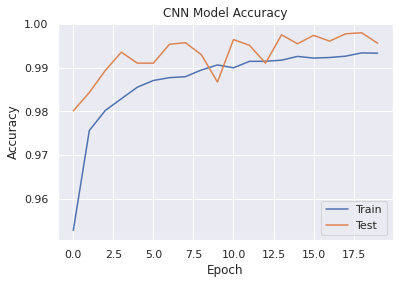

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('CNN Model Accuracy.png')
plt.show()

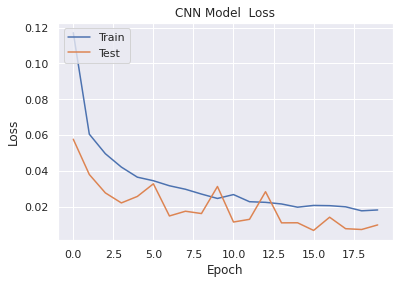

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('CNN Model Loss.png')
plt.show()

In [ ]:
predict = convnet.predict(X_test, verbose=1)

653/653 [==============================] - 2s 2ms/step


In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1

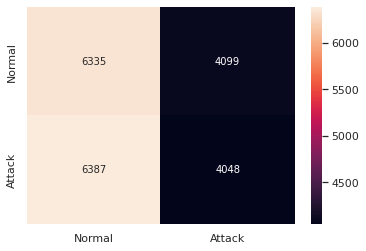

In [ ]:
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Normal","Attack"],columns = ["Normal","Attack"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [ ]:
scores = convnet.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (convnet.metrics_names[1], scores[1]*100))

accuracy: 99.50%
